### *`Function Transformer`*

- These are ***`Varibale Transformers`***. This is a kind of ***`Feature Transformation`***.
- Here we will learn about ***`Mathematical Transformation`***. The idea is to transform a column by applying a mathematical formula. Here we will learn about ***`Log Transform`***, ***`Reciprocal Transform`***, ***`Square Root Transform`***. The ***`Square Root Transform`*** is a type of ***`Power Transform`***.
- Here by applying these functions the distribution of data in that column ***`(PDF)`*** transformed into a ***`Normal Distribution`***.
- In the ***`SKlearn`*** library there are three types of mathematical transformers are there:
    - ***`Function Transformer`***
        - Most used transformer.
        - Here by using this we can do ***`Log Transform`***, ***`Reciprocal Transform`***, ***`Square Root Transform`*** and any kind of ***`Custom Transform`*** of our own.
    - ***`Power Transformer`***
        - Here mainly two types of transform we can do ***`Box Cox Transform`*** and ***`Yo-Johnson Transform`***.
    - ***`Quantile Transformer`***
        - Not used as much.

#### How to know the data is Normally distributed or not?

- Use ***`sns.distplot()`*** to see the distribution.
- Or use ***`pd.skew()`***, if the result is *`0`* then it is normal else it is *`positivly`* or *`negatively`* skewed.
- We can also use ***`QQ plot`***. This is the most reliable way to find whether the distribution is normal or not.
    - Here to know whether the distribution is normal or not we need to see the data points on the line.
    - The more the data points are on the line the more normal the distribution is.
    - The more the data points are far from the line and the more the line changes it's angle the more far the distribution is from normal distribution.

#### *`Log Transform`*

- To apply ***`Log Transform`*** on a distribution we need to take *`log`* of all the data points in that column.
- It doesnot make the data totally normally distributed but the distribution becomes better than previous.
- Remember ***`Log Transform`*** doesnot work on *`negative`* values.
- If the data distribution is *`right skewed`* then applying this transformation brings the distribution towards *`center`*. 
- So it is better to use with *`right skewed`* data.

#### *`Reciprocal Transform`*

- Here we use the formula of *`(1/x)`* on the distribution.
- Here by applying this transform technique all the *`smaller`* values will transformed to *`lareger`* values and vice versa.
- It is sometimes applicable.

#### *`Square Transform`*

- Here we use the formula of *$x^{2}$* on the distribution.
- Mainly used for *`left skewed`* data.


#### *`Square Root Transform`*

- Not so used.

In [1]:
# importing the models

import pandas as pd
import numpy as np

# to plot the QQ plot
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# we use FunctionTransformer to apply the transformations
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset with particular columns

df = pd.read_csv('datasets/train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
# checking for null values

df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
# Now filling this missing values with the mean value of the age

df['Age'].fillna(df['Age'].mean(), inplace=True)

In [5]:
# checking again for null values

df.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

#### Doing train test split

In [6]:
# Differentiate independent and dependent variables

X = df.iloc[:, 1:3]
y = df.iloc[:, 0]

In [7]:
X.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((712, 2), (179, 2))

#### Now let's see the distribution of the columns using *`PDF`* and *`QQ plot`*

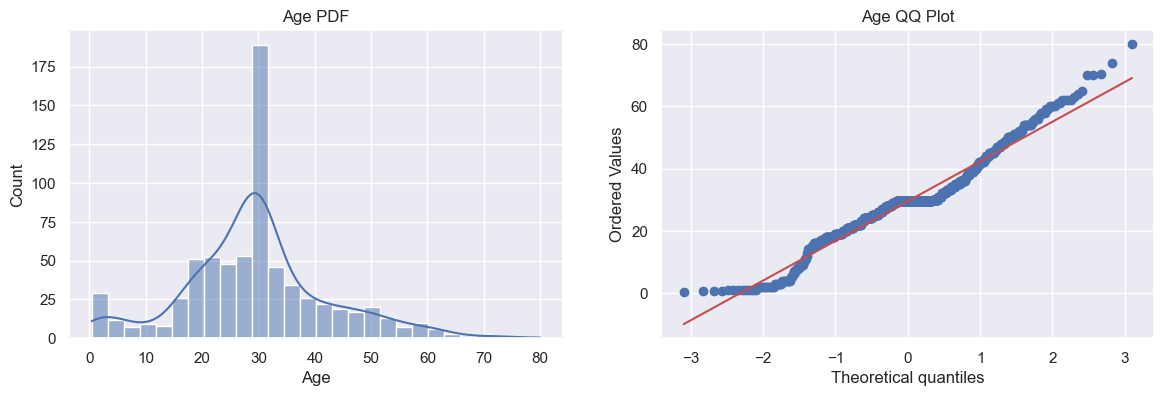

In [9]:
# for 'Age' column

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x=X_train['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

**Notes:**

- Here we can see a close to normal distribution and that is also reflected on the *`QQ plot`* as most of the data points are on the line or close to the line.

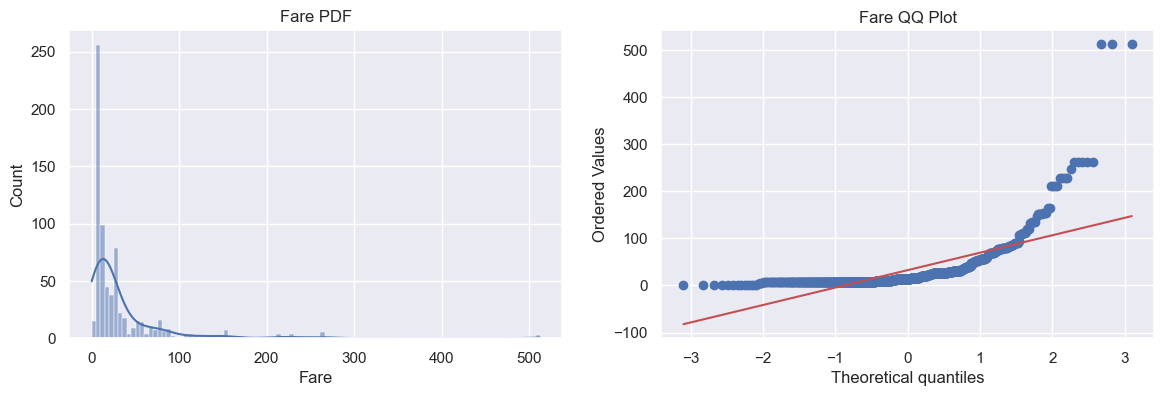

In [10]:
# for 'Fare' column

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x=X_train['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

**Notes:**

- This is totally *`right skewed`* distribution. It also reflected in the *`QQ plot`*.
- As it is a *`right skewed`* distribution so we will use the *`Log Transform`* to transform the distribution to `normal` distribution.

#### First we will check the model accuracy with this not transformed data

In [11]:
# Creating two models of Logistic regression and Decision Tree

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [12]:
# Training the models

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
# Doing predictions and checking accuracy

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)


print(f"The accuracy of the Logistic Regression model with non transformed data is: {(accuracy1)*100:.2f}%")
print(f"The accuracy of the Decision Tree model with non transformed data is: {(accuracy2)*100:.2f}%")

The accuracy of the Logistic Regression model with non transformed data is: 64.80%
The accuracy of the Decision Tree model with non transformed data is: 65.36%


### Now applying `Log Transform` to both the input columns

In [14]:
# Here we will call the FunctionTransformer()
# 'func' argument is to pass what kind of mathematical function we want to apply

trf = FunctionTransformer(func=np.log1p)

##### Difference between `np.log` and `np.log1p`

- The *`np.log`* applies *`log`* to all the values but if there is a *`0`* in the distribution then there will be error.
- Whereas the *`np.log1p`* first adds 1 with all the *`x`* values in the distribution and then applies *`log`* on them, so there will be no problem occurs due to *`0`* in the distribution.

In [15]:
# Now transforming both the train and test data with the transformer

X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [16]:
# Again training the models but this time with transformed data

clf1.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [17]:
# Doing predictions and checking accuracy

y_pred1 = clf1.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)


print(f"The accuracy of the Logistic Regression model with transformed data is: {(accuracy1)*100:.2f}%")
print(f"The accuracy of the Decision Tree model with transformed data is: {(accuracy2)*100:.2f}%")

The accuracy of the Logistic Regression model with transformed data is: 68.16%
The accuracy of the Decision Tree model with transformed data is: 66.48%


**Notes:**

- Here we can see that after transforming the data there is not much change in accuracy for the *`Decision Tree`* model but for the *`Logistic Regression`* model the accuracy has increased by more than *`3%`*.
- Now we need to *`Cross validate`* to see whether the change in accuracy is correct or not.

In [18]:
# transforming the entire column X
X_transformed = trf.fit_transform(X)

# now again creating models

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

# Now doing Cross validations to see results
print("Accuracy of LR model after cross validation: ",
      np.mean(cross_val_score(clf1, X_transformed, y, scoring='accuracy', cv=10)))
print("Accuracy of DT model after cross validation: ",
      np.mean(cross_val_score(clf2, X_transformed, y, scoring='accuracy', cv=10)))

Accuracy of LR model after cross validation:  0.678027465667915
Accuracy of DT model after cross validation:  0.6577652933832708


**Notes:**

- So here we can see that even after running *`10`* times the average accuracy of the *`Logistic Regression`* model is around *`68%`*. So we can certainly say that there is an improvement after transforming the data.

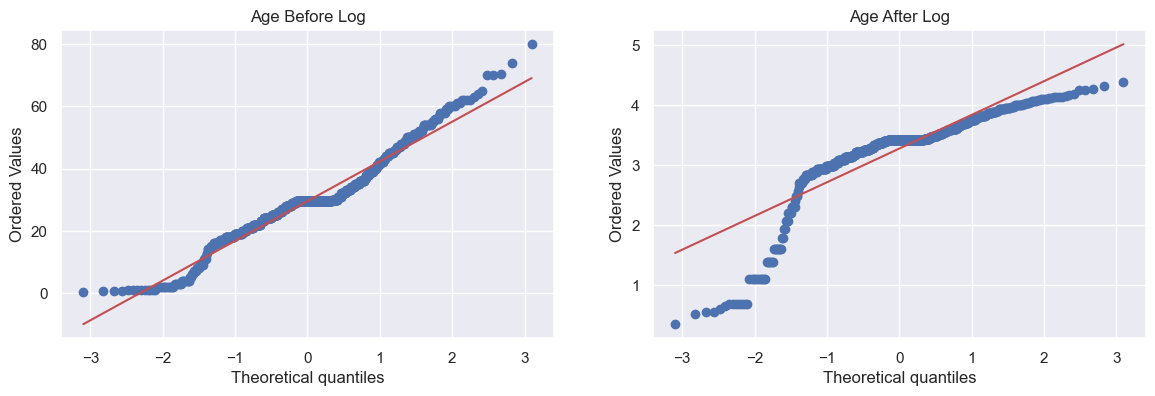

In [19]:
# Now visualizing the change in distribution of 'Age'

plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

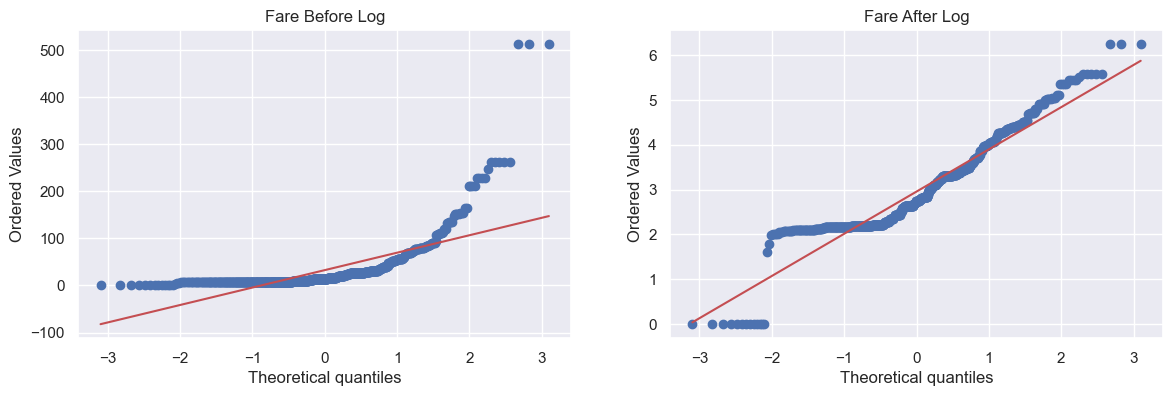

In [20]:
# Now visualizing the change in distribution of 'Fare'

plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

**Notes:**

- Here we can see drastic improvement in the column `Fare` but in case of `Age` it was better before the transformation.

#### Now applying `Log Transform` only on column `Fare`

In [21]:
# again creating a transformer to transform only the 'Fare' column

trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], 
                         remainder='passthrough')

In [22]:
# Now transforming both the train and test data with the transformer

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [23]:
# Again training the models but this time with newly transformed data

clf1.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

DecisionTreeClassifier()

In [24]:
# Again doing predictions and checking accuracy

y_pred1 = clf1.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)

accuracy1 = (accuracy1)*100
accuracy2 = (accuracy2)*100


print(f"The accuracy of the LR model with transformed data is: {accuracy1:.2f}%")
print(f"The accuracy of the Tree model with transformed data is: {accuracy2:.2f}%")

The accuracy of the Logistic Regression model with transformed data is: 67.04%
The accuracy of the Decision Tree model with transformed data is: 67.60%


In [25]:
# Just to be sure we use again cross validation on this transformation\
# transforming the entire column X
X_transformed2 = trf2.fit_transform(X)

# now again creating models

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

# Now doing Cross validations to see results
print("Accuracy of LR model after cross validation: ",
      np.mean(cross_val_score(clf1, X_transformed2, y, scoring='accuracy', cv=10)))
print("Accuracy of DT model after cross validation: ",
      np.mean(cross_val_score(clf2, X_transformed2, y, scoring='accuracy', cv=10)))

Accuracy of LR model after cross validation:  0.6712609238451936
Accuracy of DT model after cross validation:  0.6644569288389512


In [26]:
# Here we created a function where we will get plots for the transformation we pass

def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], 
                            remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,
                                             scoring='accuracy',
                                             cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6442446941323345


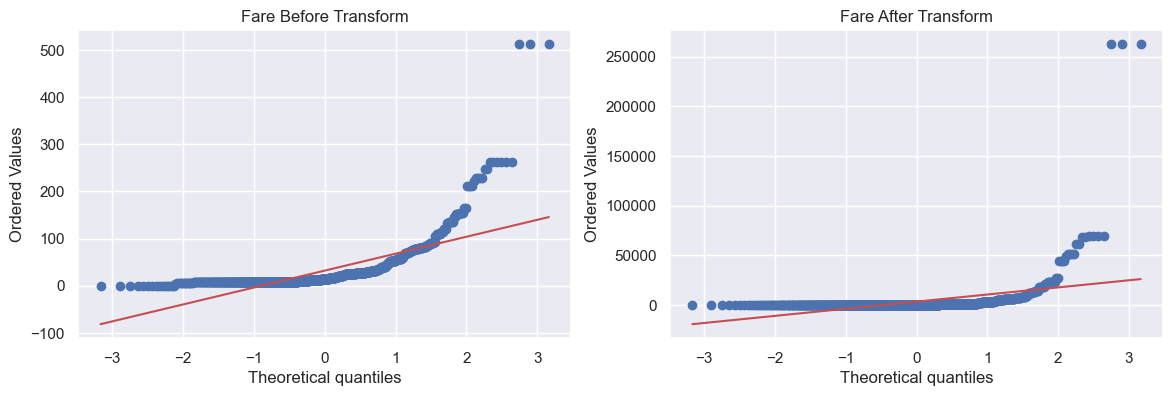

In [27]:
# Now doing for square transform

apply_transform(lambda x: x**2)

Accuracy 0.6589013732833957


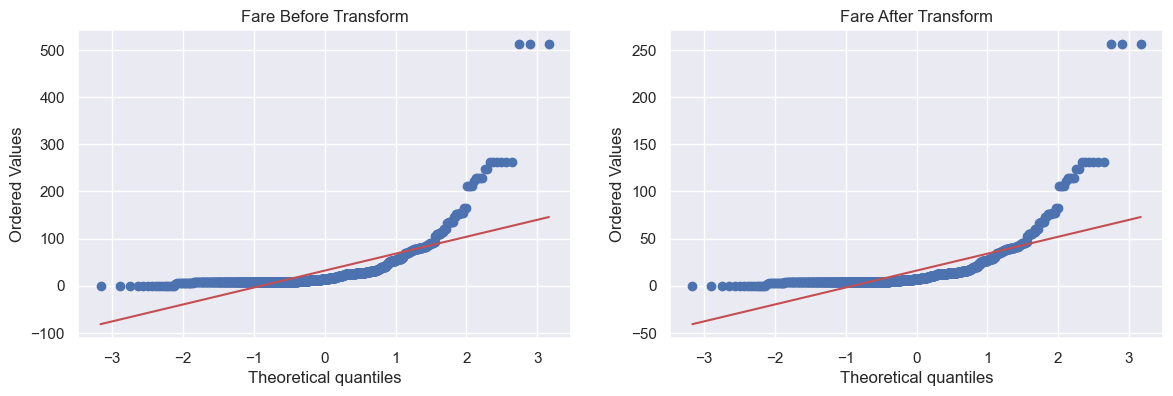

In [28]:
# Now doing for square root transform

apply_transform(lambda x: x**1/2)

Accuracy 0.61729088639201


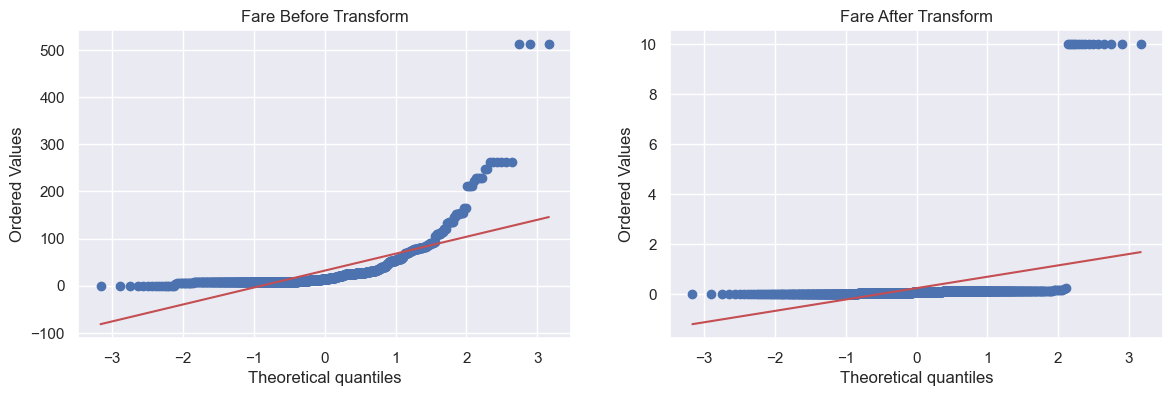

In [29]:
# Now doing for reciprocal transform
# Here there may be some 0 value in the distribution 
# so we add 0.1 to x so the denominator never becomes 0

apply_transform(lambda x: 1/(x+0.1))

**Notes:**

- So we can see that `Log transform` gives the best result.